In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from test_notebook import compute_vals, visualize_fav_season

CARD = ["heart", "club", "spade", "diamond"]
COLOR_CARD = ["red", "black"]

In [2]:
data = pd.read_csv(r"C:\Users\MY PC\Data-Science-Club\Getting_started\intro_data.csv")

In [4]:
cols = list(data.columns)
rename_cols = ["gender", "uni_year", "major", "age_group", "intl_or_not", "big_college_fear", 
			   "fav_food", "fav_season", "fav_past_time", "sleep_hour", "roadtrip_vs_vacation", 
			   "times_asleep_inclass"]
rename_dict = {}

for i in range(len(cols)):
	rename_dict[cols[i]] = rename_cols[i]

rename_dict

{'What is your gender?  ': 'gender',
 'What year are you in college?  ': 'uni_year',
 'What is your major or field of study?  ': 'major',
 'What is your age group?  ': 'age_group',
 'Are you an international student?  ': 'intl_or_not',
 'Column 6': 'big_college_fear',
 'Column 7': 'fav_food',
 'Column 8': 'fav_season',
 'Column 9': 'fav_past_time',
 'Column 10': 'sleep_hour',
 'Column 11': 'roadtrip_vs_vacation',
 'Column 12': 'times_asleep_inclass'}

In [5]:
data.rename(columns=rename_dict, inplace=True)

In [6]:
data 

,gender,uni_year,major,age_group,intl_or_not,big_college_fear,fav_food,fav_season,fav_past_time,sleep_hour,roadtrip_vs_vacation,times_asleep_inclass
0,Male,Sophomore,q,18-20,Yes,Public speaking,Mac and cheese,Summer,Scrolling social media,1,Spontaneous road trip,1
1,Female,Sophomore,e,21-23,Yes,Finding a job/intern,Chocolate,Fall,Hanging out with friends,1,Plan a month-long vacation,1
2,Male,Sophomore,cs,18-20,Yes,Group projects,Ramen,Fall,Hanging out with friends,8,Plan a month-long vacation,2
3,Male,Senior,q,18-20,Yes,Public speaking,Mac and cheese,Summer,Scrolling social media,1,Spontaneous road trip,1
4,Female,Sophomore,e,21-23,Yes,Finding a job/intern,Chocolate,Fall,Hanging out with friends,1,Plan a month-long vacation,1
5,Male,Junior,q,18-20,Yes,Public speaking,Mac and cheese,Fall,Hanging out with friends,8,Plan a month-long vacation,2
6,Female,Sophomore,e,21-23,Yes,Finding a job/intern,Chocolate,Summer,Scrolling social media,1,Spontaneous road trip,1
7,Male,Senior,q,18-20,Yes,Public speaking,Mac and cheese,Summer,Scrolling social media,1,Spontaneous road trip,1
8,Female,Sophomore,e,21-23,Yes,Finding a job/intern,Chocolate,Fall,Hanging out with friends,1,Plan a month-long vacation,1
9,Female,Sophomore,e,21-23,Yes,Finding a job/intern,Chocolate,Summer,Scrolling social media,1,Spontaneous road trip,1


## 1. Analyze data and compute necessary values

In [7]:
data.describe()

,sleep_hour,times_asleep_inclass
count,12.000000,12.000000
mean,2.166667,1.166667
std,2.724746,0.389249
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,8.000000,2.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   gender                12 non-null     object
 1   uni_year              12 non-null     object
 2   major                 12 non-null     object
 3   age_group             12 non-null     object
 4   intl_or_not           12 non-null     object
 5   big_college_fear      12 non-null     object
 6   fav_food              12 non-null     object
 7   fav_season            12 non-null     object
 8   fav_past_time         12 non-null     object
 9   sleep_hour            12 non-null     int64 
 10  roadtrip_vs_vacation  12 non-null     object
 11  times_asleep_inclass  12 non-null     int64 
dtypes: int64(2), object(10)
memory usage: 1.3+ KB


In [14]:
def compute_vals(df: pd.DataFrame, card: list, target_col: str, team_col: str):
	for i in range(len(card)):
		df_team = df[df[team_col] == card[i]]
		av_hour = df_team[target_col].mean()
		min_hour = df_team[target_col].min()
		max_hour = df_team[target_col].max()
		print(f"The average hours of sleep for team {card[i]} is {av_hour}")
		print(f"The minimum hours of sleep for team {card[i]} is {min_hour}")
		print(f"The maximum hours of sleep for team {card[i]} is {max_hour}")
		print()

# compute_vals(data, COLOR_CARD, "sleep_hour", "card_col")
compute_vals(data, CARD, "times_asleep_inclass", "card_col")

The average hours of sleep for team Male is 1.3333333333333333
The minimum hours of sleep for team Male is 1
The maximum hours of sleep for team Male is 2

The average hours of sleep for team Female is 1.0
The minimum hours of sleep for team Female is 1
The maximum hours of sleep for team Female is 1



## 2. Visualize data

- Bar chart on favorite seasons

In [ ]:
def visualize_fav_season(df: pd.DataFrame, card: list, target_col: str, 
						 nrow: int = 1, ncol: int = 2):
	
	_, axes = plt.subplots(nrow, ncol, figsize=(16, 12), sharex=True)
	for i, team in enumerate(card):     # team: heart
		team_df = df[df["card_col"] == team]
		x_axis = list(dict(team_df[target_col].value_counts()).keys())
		y_axis = list(dict(team_df[target_col].value_counts()).values())
		axes[i].bar(x_axis, y_axis)
		axes[i].set_ylabel('Number of students')
		axes[i].set_title(f"Favorite seasons in team {team}")
		axes[i].legend(title='Favorite seasons')

	plt.title("Favorite seasons in each team")
	plt.show()

visualize_fav_season(data, CARD, "season", 2, 2)

- Percentage pie chart on biggest college fears

In [ ]:
def visualize_big_fear(df: pd.DataFrame, card: list, target_col: str, 
						 nrow: int = 1, ncol: int = 2):
	
	_, axes = plt.subplots(nrow, ncol, figsize=(16, 12), sharex=True)
	for i, team in enumerate(card):     # team: heart
		team_df = df[df["card_col"] == team]
		labels = list(dict(team_df[target_col].value_counts()).keys())
		x = list(dict(team_df[target_col].value_counts()).values())
		axes[i].pie(x, labels=labels, autopct='%1.1f%%')
		axes[i].set_title(f"Fear proportion in team {team}")

	plt.title("Illustration of college fear at today's event")
	plt.show()

visualize_big_fear(data, CARD, "big_college_fear", 2, 2)

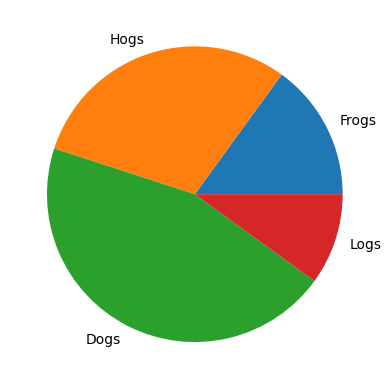

In [22]:
import matplotlib.pyplot as plt

labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
plt.show()

## 3. Make predictions